<h1 align='center'> Ground Motion Response Spectra </h1>

**Purpose:** To double-check the functions coded to obtain the response spectra from earthquake ground motions

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import llgeo.motions.spectra as llgeo_spectra

## BC 2007 Earthquake
- Data and response plots taken from COSMOS (https://www.strongmotioncenter.org/vdc/scripts/plotspec.plx?stn=4120&evt=1116&scale=log)

- Plots to check against can be found on the same website (https://www.strongmotioncenter.org/vdc/scripts/plotspec.plx?stn=4119&evt=1116&scale=log)

In [24]:
# Read data
dt = 0.005
Ts = np.logspace(-2, 1.5, 100)
acc = np.genfromtxt('bc2007.dat', skip_header = 1, delimiter = 10).flatten() # cm/s/s
time = np.arange(0, len(acc)*dt, dt)

# Get peak spectral responses
SD, PSV, PSA, SA, SV, ED = llgeo_spectra.resp_spectra_wang(acc, dt, Ts)

[None, None, None]

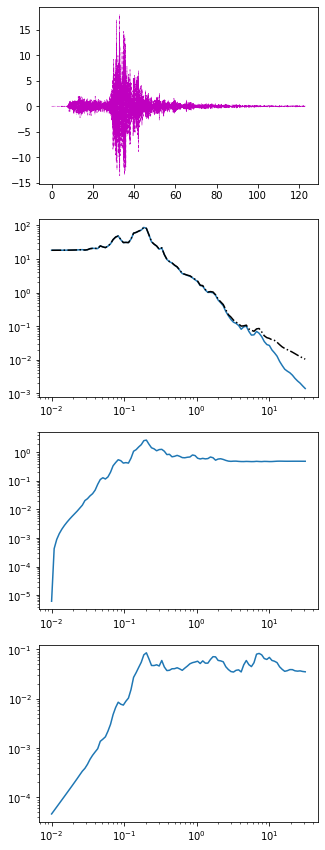

In [25]:
fig, axes = plt.subplots(4, 1, figsize = (5, 15))

# Plot original time history
axes[0].plot(time, acc, linestyle = '-.', linewidth = 0.5, color = 'm')

# Absolute acceleration, relative velocity, relative displacements
axes[1].plot(Ts, PSA)
axes[1].plot(Ts, SA, '-.k')
axes[2].plot(Ts, SV)
axes[3].plot(Ts, SD)

# Logscale
[ax.set_xscale('log') for ax in axes[1:]]
[ax.set_yscale('log') for ax in axes[1:]]